# Unsupervised clustering of a retail store's customer database to perform Demographic Segmentation and Customer Profiling

#### About the dataset
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and to modify its product based on its target customers from different types of customer segments, accomodating to the specific needs, behaviors and concerns of different types of customers.

For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

##### Features

**1. Customer Information**

- **ID**: Customer's unique identifier
- **Year_Birth**: Customer's birth year
- **Education**: Customer's education level
- **Marital_Status**: Customer's marital status
- **Income**: Customer's yearly household income
- **Kidhome**: Number of children in customer's household
- **Teenhome**: Number of teenagers in customer's household
- **Dt_Customer**: Date of customer's enrollment with the company
- **Recency**: Number of days since customer's last purchase
- **Complain**: 1 if the customer complained in the last 2 years, 0 otherwise

**2. Product Information: Amount spent on unique items in last 2 years**

- **MntWines**: Wine
- **MntFruits**: Fruits 
- **MntMeatProducts**: Meat
- **MntFishProducts**: Fish 
- **MntSweetProducts**: Sweets 
- **MntGoldProds**: Gold 

**3. Promotion**

- **NumDealsPurchases**: Number of purchases made with a discount
- **AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- **AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- **AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- **AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- **AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- **Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise

**4. Place**

- **NumWebPurchases**: Number of purchases made through the company’s website
- **NumCatalogPurchases**: Number of purchases made using a catalogue
- **NumStorePurchases**: Number of purchases made directly in stores
- **NumWebVisitsMonth**: Number of visits to company’s website in the last month

In [153]:
# Importing libraries
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Runtime Configuration Parameters for Matplotlib
plt.rcParams['font.family'] = 'Verdana'
plt.style.use('ggplot')

In [154]:
# Load data
cust_data = pd.read_csv('marketing_campaign.csv', sep = '\t')
print('No. of observations: ', len(cust_data))
cust_data.head()

No. of observations:  2240


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [155]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [156]:
# Missing value analysis
def missing_values(df):
    total_null = df.isna().sum()
    percent_null = total_null / df.count() # Total count of null values / Total count of values
    missing_data = pd.concat([total_null, percent_null], axis = 1, keys = ['Total Null', 'Percentage Null'])
    return missing_data

missing_values(cust_data)

Total Null  Percentage Null
ID                            0          0.00000
Year_Birth                    0          0.00000
Education                     0          0.00000
Marital_Status                0          0.00000
Income                       24          0.01083
Kidhome                       0          0.00000
Teenhome                      0          0.00000
Dt_Customer                   0          0.00000
Recency                       0          0.00000
MntWines                      0          0.00000
MntFruits                     0          0.00000
MntMeatProducts               0          0.00000
MntFishProducts               0          0.00000
MntSweetProducts              0          0.00000
MntGoldProds                  0          0.00000
NumDealsPurchases             0          0.00000
NumWebPurchases               0          0.00000
NumCatalogPurchases           0          0.00000
NumStorePurchases             0          0.00000
NumWebVisitsMonth             0          0.00000
AcceptedCmp3                  0          0.00000
AcceptedCmp4                  0          0.00000
AcceptedCmp5                  0          0.00000
AcceptedCmp1                  0          0.00000
AcceptedCmp2                  0          0.00000
Complain                      0          0.00000
Z_CostContact                 0          0.00000
Z_Revenue                     0          0.00000
Response                      0          0.00000

#### Observations:
- There is a small percentage of values missing from income. We can go ahead and drop those observations
- Another thing to note is that `Dt_Customer` is in the str datatype, and have to be parsed to DateTime
- `Education` and `Marital_Status` are in the str datatype as well, hence will have to be encoded into numeric datatypes

In [157]:
# Drop NAs
cust_data = cust_data.dropna()
print('Total observation count after missing value treatment: ', len(cust_data))

Total observation count after missing value treatment:  2216


## 1. Feature Engineering

### 1.1 Dt_Customer
- Creating a new feature to get a count of number of days since the customer is registered with the company
    - Base value will be the date recorded corresponding to the most recent customer

In [158]:
# Converting column datatype 
cust_data['Dt_Customer'] = pd.to_datetime(cust_data['Dt_Customer'])

In [159]:
# Loop to calculate days
dates = [x.date() for x in cust_data['Dt_Customer']] # datetime.date()

# Most recent customer 
print("Newest customer's enrollment date in records: ", max(dates))
# Oldest customer
print("Oldest customer's enrollment date in records: ", min(dates))

Newest customer's enrollment date in records:  2014-12-06
Oldest customer's enrollment date in records:  2012-01-08


##### New feature 'Customer_For' - number of days since customer enrolled relative to the last recorded data

In [160]:
# Stored as datetime.timedelta datatype
days = [max(dates) - d for d in dates] 

In [161]:
# Append to dataframe
cust_data['Customer_For'] = days
# Set error = ‘coerce’, then invalid parsing will be set as NaN
cust_data['Customer_For'] = pd.to_numeric(cust_data['Customer_For'], errors = 'coerce') 

### 1.2 Understanding the only two categorical features `Marital_Status` and `Education`

In [162]:
# Marital_Status
print("Total categories in 'Marital Status' feature:")
print(cust_data.Marital_Status.value_counts(), '\n')

# Education
print("Total categories in 'Education' feature:")
print(cust_data.Education.value_counts(), '\n')

Total categories in 'Marital Status' feature:
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in 'Education' feature:
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64 



### 1.3 Education

In [163]:
# Binning in 3 categories - Undergraduate, Graduate, Postgraduate
cust_data['Education'] = cust_data['Education'].replace({'Graduation': 'Graduate', 'PhD': 'Postgraduate', 'Master': 'Postgraduate', '2n Cycle': 'Undergraduate', 'Basic': 'Undergraduate'})

### 1.4 New features

- `Age`: Extracting age of customer by `Year_Birth` indicating the birth year
- `Amount_Spent`: Total amount in $ spent in 2 years time
- `Living_with`: Living alone or with partner
- `Children`: Total children in customer's household (kids/teens)
- `Family_Size`
- `Is_Parent`

#### 1.4.1 Age

In [164]:
# Extracting age of customer
cust_data['Age'] = 2022 - cust_data['Year_Birth']

#### 1.4.2 Amount_Spent

In [165]:
# Total amount spent on Wine, Fruits, Meat, Fish,Sweets, Gold
cust_data['Amount_Spent'] = cust_data['MntWines'] + cust_data['MntFruits'] + cust_data['MntMeatProducts'] + cust_data['MntFishProducts'] + cust_data['MntSweetProducts'] + cust_data['MntGoldProds']

#### 1.4.3 Living_with

In [166]:
# Deriving living situation, 'Alone' or 'Partner'
cust_data['Living_with'] = cust_data['Marital_Status'].replace({'Married': 'Partner', 
                                                                'Together': 'Partner', 
                                                                'Single': 'Alone', 
                                                                'Divorced': 'Alone', 
                                                                'Widow': 'Alone', 
                                                                'Absurd': 'Alone', 
                                                                'YOLO': 'Alone'})

#### 1.4.4 Children

In [167]:
# Counting kids and teens at home
cust_data['Children'] = cust_data['Kidhome'] + cust_data['Teenhome']

#### 1.4.5 Family_Size

In [168]:
# Estimating family size
cust_data['Family_size'] = cust_data['Living_with'].replace({'Alone': 1, 'Partner': 2}) + cust_data['Children']

#### 1.4.6 Is_Parent

In [169]:
# If Children count > 0
cust_data['Is_Parent'] = np.where(cust_data['Children'] > 0, 1, 0)

#### 1.4.7 Total_Promos

In [170]:
# Sum of all accepted coupons
cust_data['Total_Promos'] = cust_data['AcceptedCmp1'] + cust_data['AcceptedCmp2'] + cust_data['AcceptedCmp3'] + cust_data['AcceptedCmp4'] + cust_data['AcceptedCmp5']

### 1.5 Renaming columns for clarity

In [171]:
cust_data = cust_data.rename(columns = {'MntWines': 'Wine', 'MntFruits': 'Fruits', 'MntMeatProducts': 'Meat', 'MntFishProducts': 'Fish', 'MntSweetProducts': 'Sweets', 'MntGoldProds': 'Gold'})

### 1.6 Dropping few redundant features

In [172]:
# List of columns to drop
cols = ['ID','Year_Birth','Marital_Status', 'Dt_Customer',  'Z_CostContact', 'Z_Revenue']
cust_data = cust_data.drop(cols, axis = 1)

## 2. Report View of dataset

In [173]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   Wine                 2216 non-null   int64  
 6   Fruits               2216 non-null   int64  
 7   Meat                 2216 non-null   int64  
 8   Fish                 2216 non-null   int64  
 9   Sweets               2216 non-null   int64  
 10  Gold                 2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   i

In [174]:
# Report View of dataset
report  = cust_data.describe().T # Transpose Index and Cols
report_df = pd.DataFrame(index = ['Income', 'Kidhome', 'Teenhome', 
                                   'Recency', 'Wine', 'Fruits', 'Meat', 'Fish', 
                                   'Sweets','Gold', 'NumDealsPurchases', 'NumWebPurchases', 
                                   'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 
                                   'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                                   'AcceptedCmp5', 'Complain', 'Response', 'Customer_For', 'Age', 
                                   'Amount_Spent', 'Children', 'Family_size', 'Is_Parent', 'Total_Promos'], 
                         columns = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], 
                         data = report)

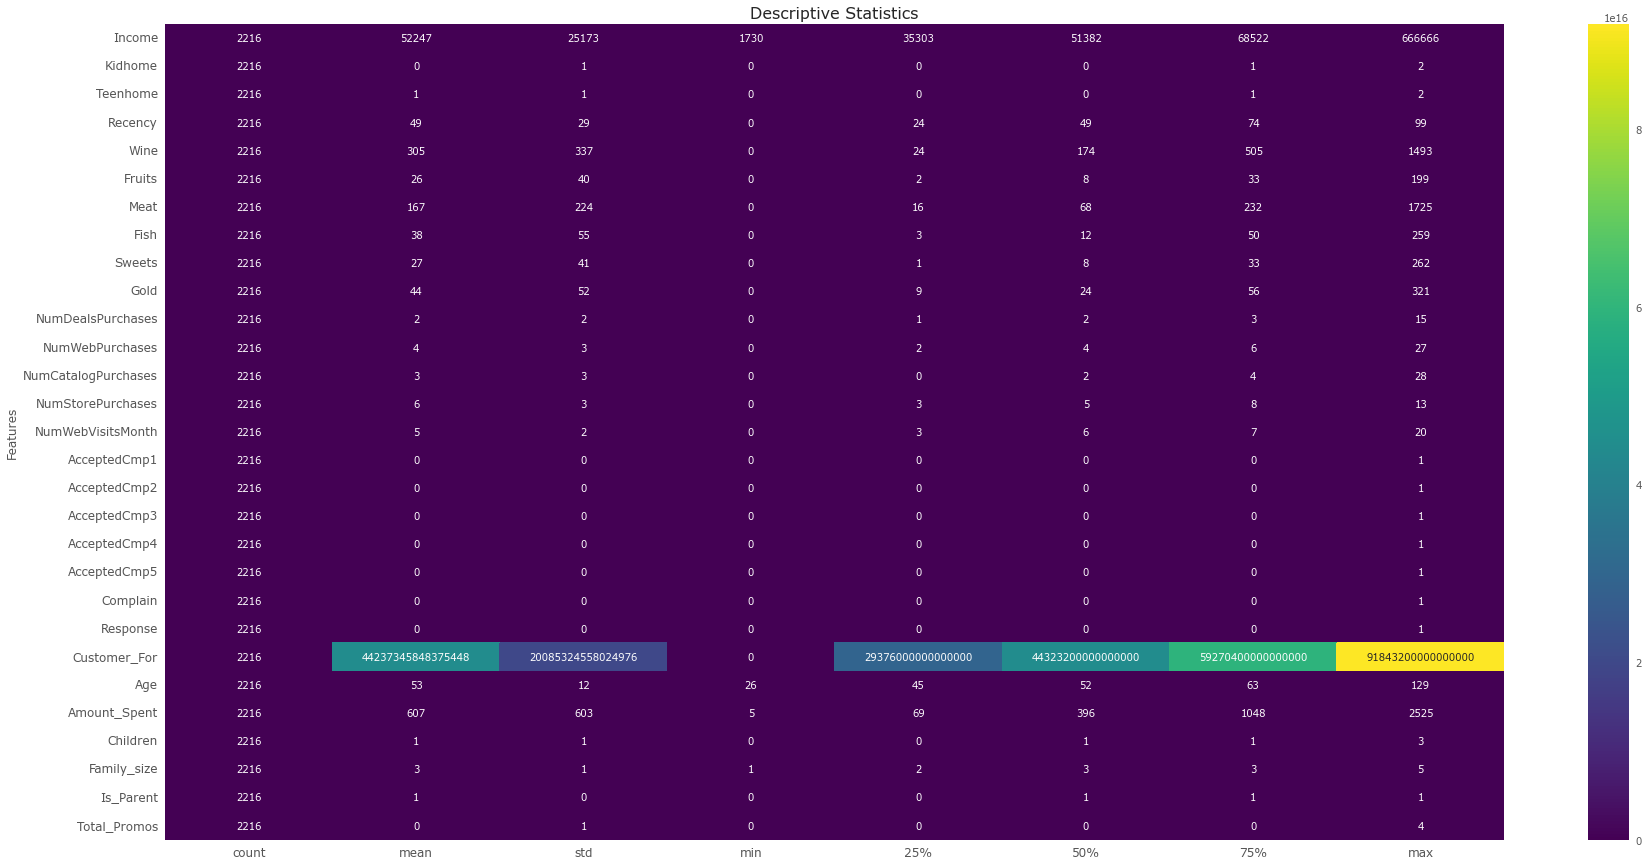

In [175]:
# Plot the report
f, ax = plt.subplots(figsize=(30, 15))

# Heatmap
sns.heatmap(report_df, annot = True, cmap = 'viridis', fmt = '.0f')
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel('Features')
plt.title('Descriptive Statistics', size = 16)
plt.show()

#### Observations: 
- Above report shows that there are certain outliers in few of the festures, such as `Income` and `Age`. We now plot a pairplot to get a better visualization of the data.

### 2.1 Outlier Handling

In [176]:
# Outlier handling
cust_data = cust_data[cust_data['Age']< 95]
cust_data = cust_data[cust_data['Income'] < 600000 ]
print('Total observations in dataset after handling missing values and outliers: ', len(cust_data))

Total observations in dataset after handling missing values and outliers:  2212


### 2.2 Pairplot

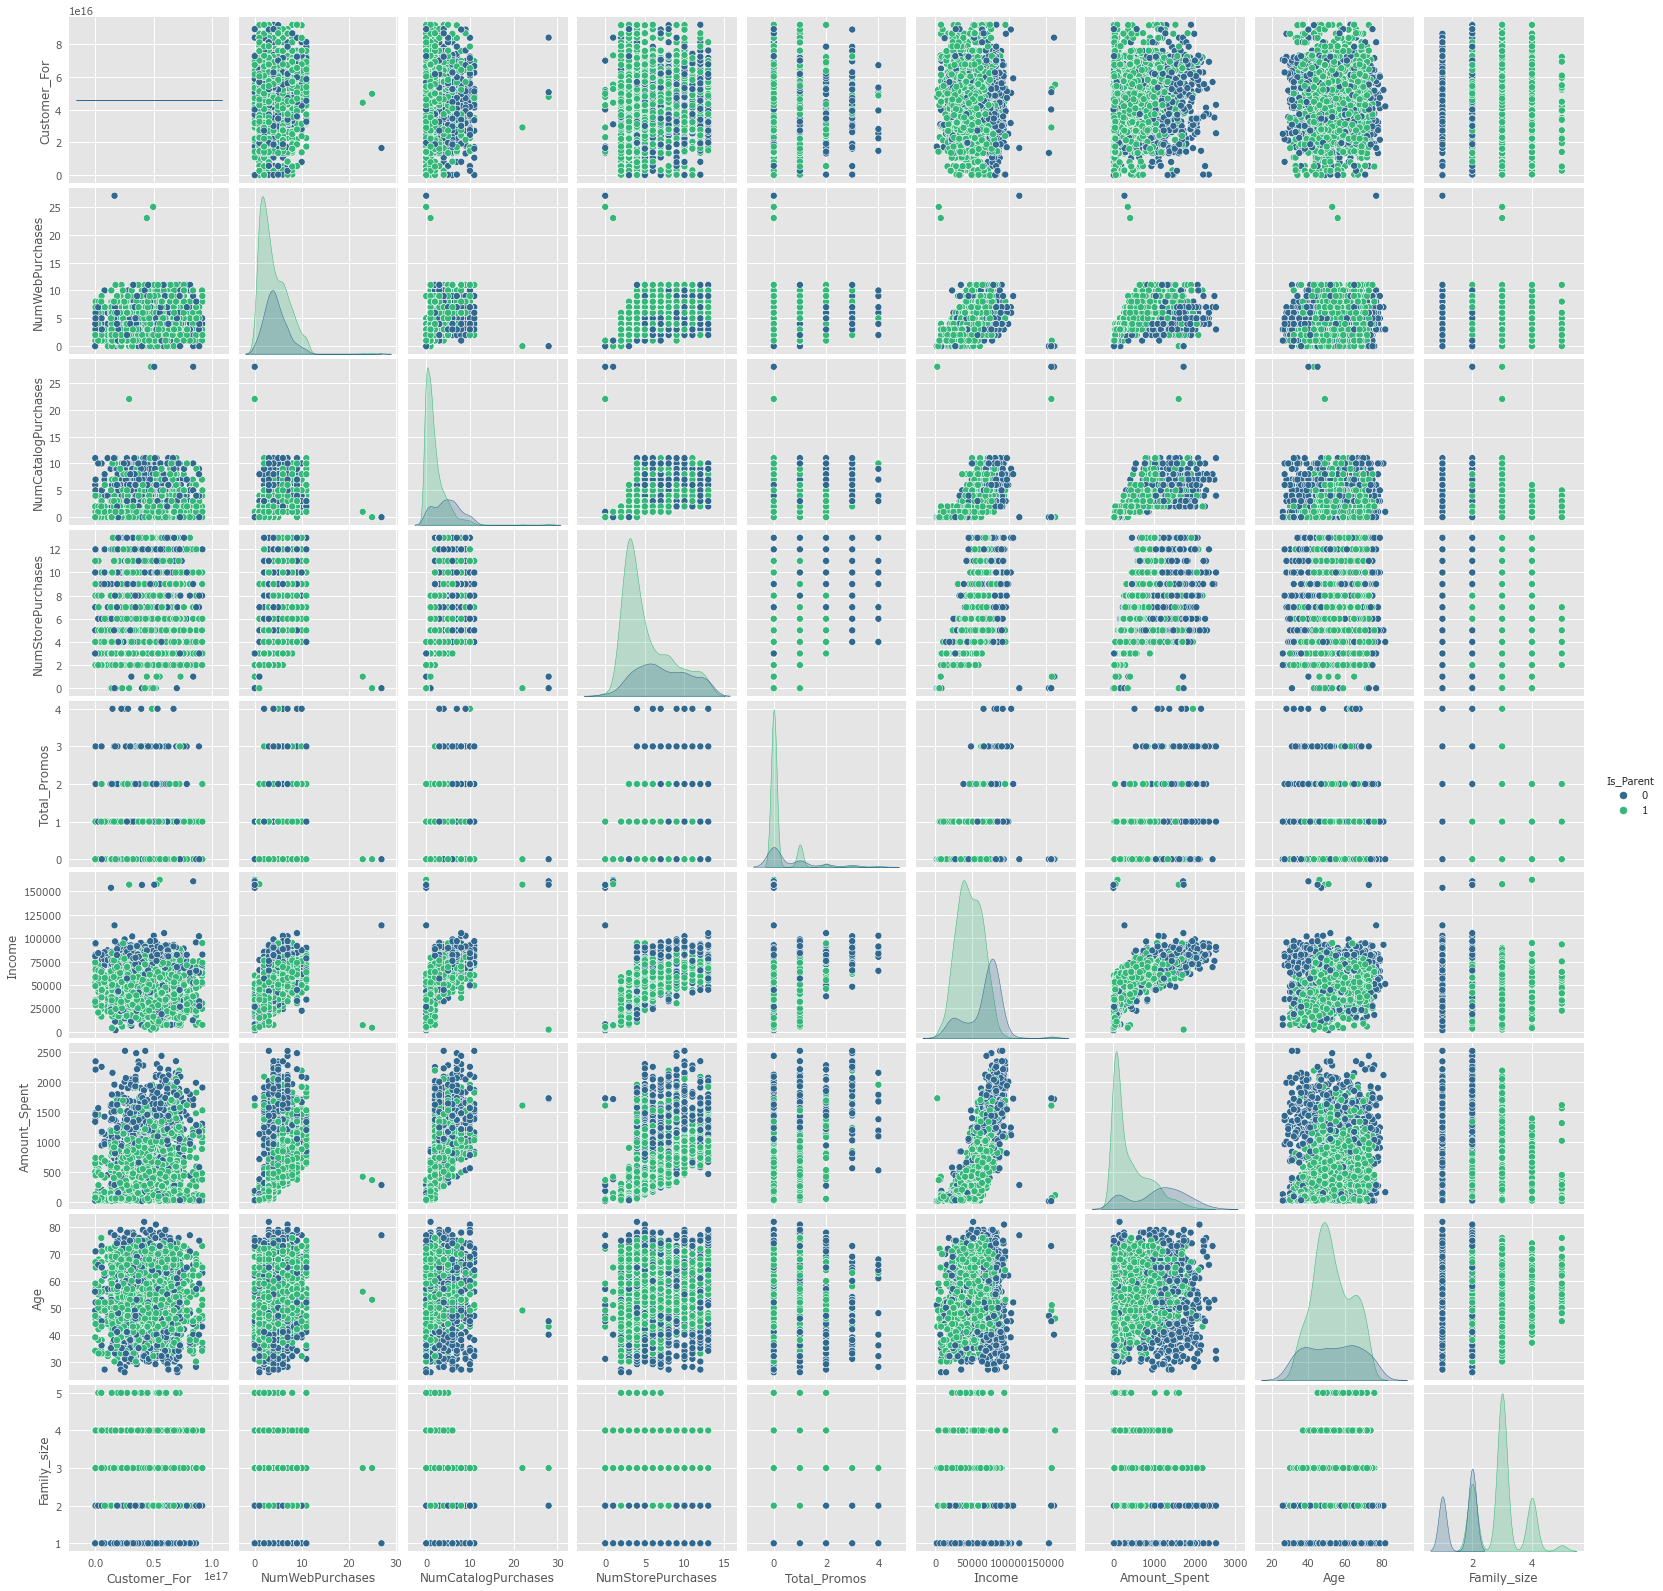

In [177]:
# Pairplot for subset of features
plotting_features = [ "Customer_For", "NumWebPurchases", "NumCatalogPurchases" ,"NumStorePurchases", "Total_Promos", "Income",
                      "Amount_Spent", "Age", "Education", "Is_Parent", "Living_with", "Family_size" ]
sns.pairplot(cust_data[plotting_features], hue = 'Is_Parent', palette = 'viridis')
plt.show()

#### Observations:
- **Amount_Spent** and **Income** have a clear strong relationship
- There is an interesting relationship between **Amount_Spent** and features such as, **NumWebPurchases**, **NumStorePurchases**, **NumCatalogPurchases**, and **Total_Promos**

We now dwell into the correlation matrix to understand the extent of the relationship between these features.

### 2.3 Correlation Matrix

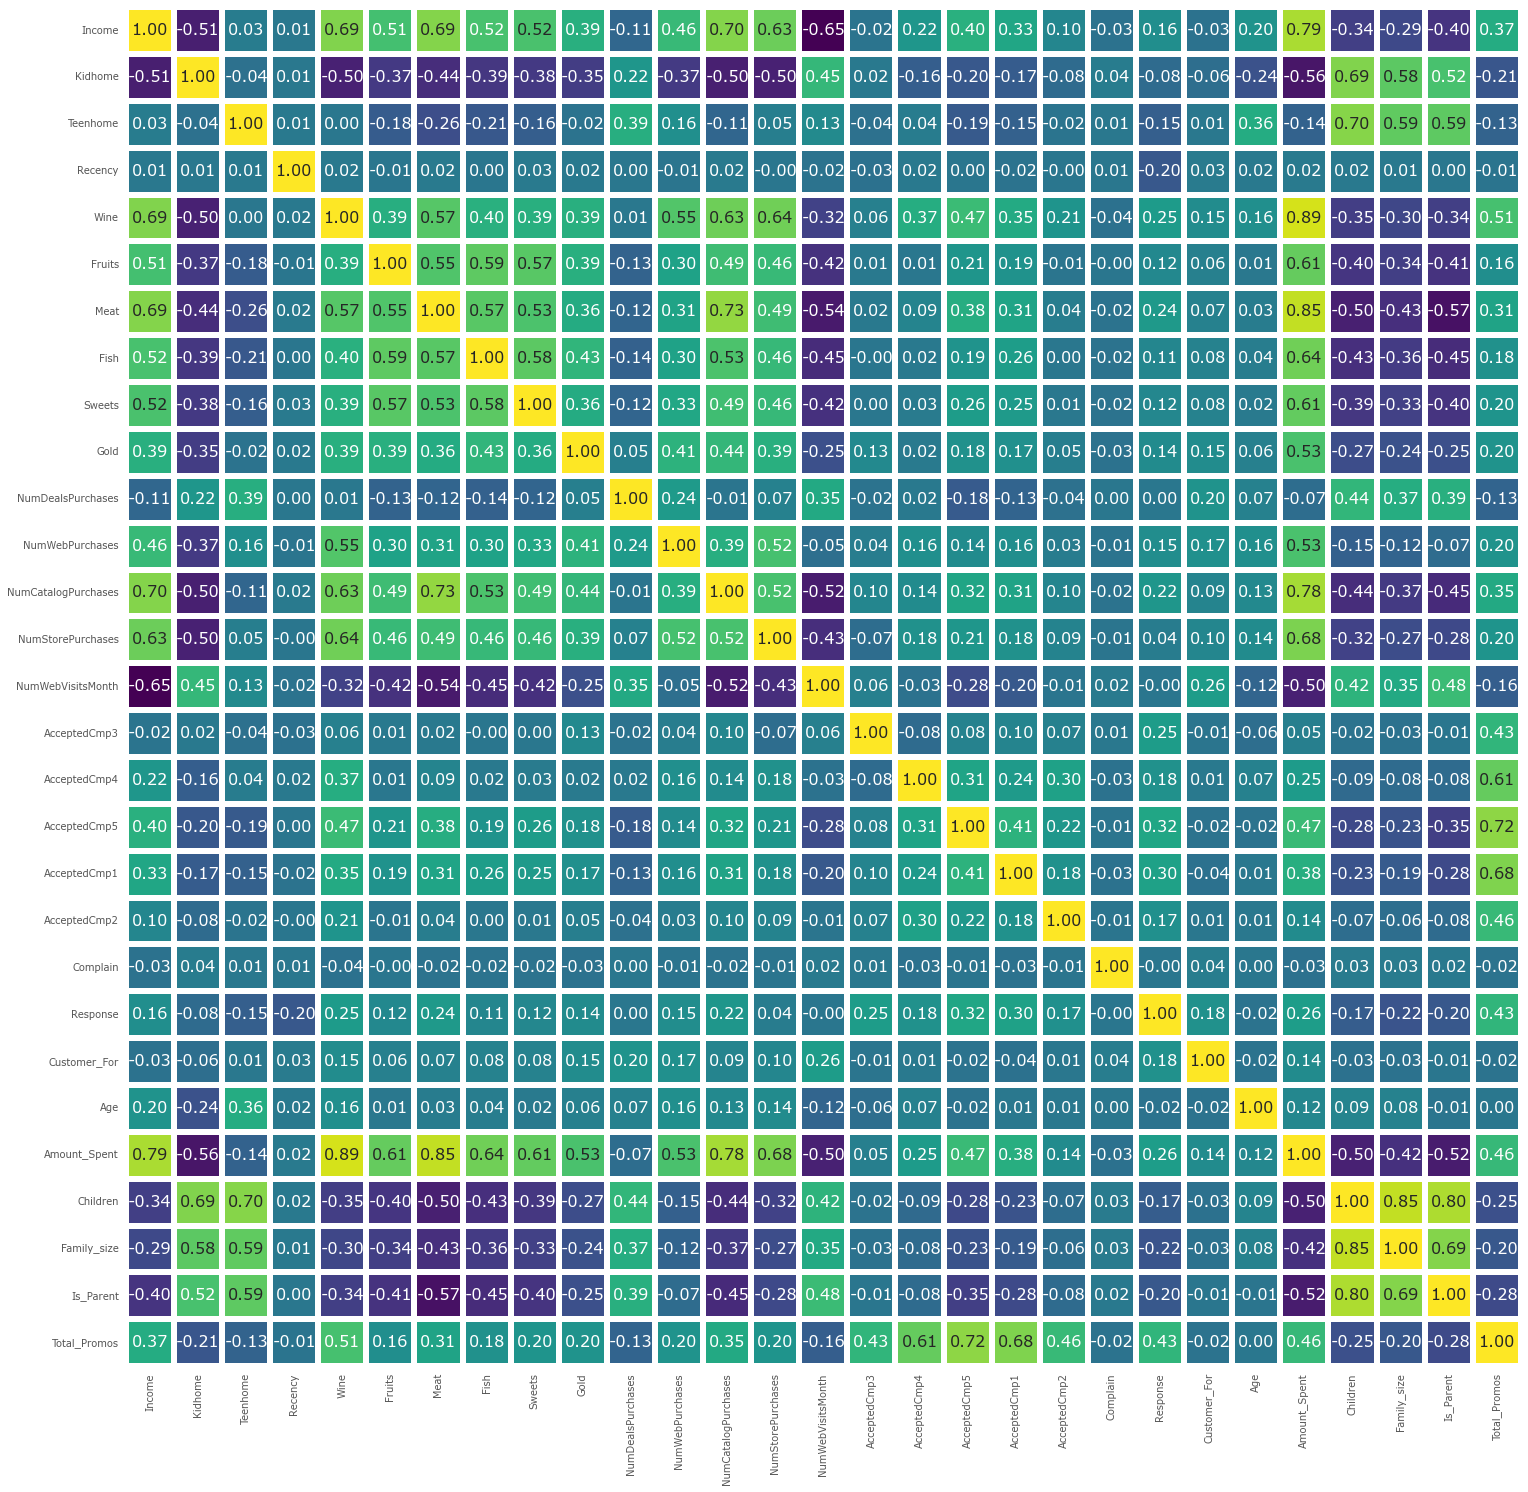

In [178]:
# Correlation plot
corr_matrix = cust_data.corr()
plt.figure(figsize = (25,25))
sns.heatmap(corr_matrix, annot = True, cmap = 'viridis', cbar = False, fmt = '0.2f', linewidths = 5, annot_kws = {'size': 16})

#### Observations: 
- **Income** and **Amount_Spent** has the highest strong positive correlation 
- **Amount_Spent** is strongly and positively correlated to **Wine, Fruits, Meat, Fish, Sweets, Gold**, since the aggregate amount of these items makes up the Amount_Spent feature
- **Total_promos** have a strong and positive correlation with **AcceptedCmp** features
- **Amount_Spent** is also strongly and positively correlated to **NumWebPurchases**, **NumStorePurchases**, **NumCatalogPurchases**, and **Total_Promos**

In the following steps we will analyze the **Income** and **Amount_Spent** relationship, as well as **Amount_Spent** and the rest of the features present in the dataset.

## 3. Data Preprocessing 
- Label Encoding for categorical features
- Scale features using StandardScaler (since we do not have too many outliers, use RobustScaler otherwise)
- Creating subset of dataset for dimensionality reduction

In [179]:
# Import library
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

### 3.1 Encoding

#### Why do we need to encode the categorical attributes?
- For e.g., consider video game genres, if we directly fed the GenreLabel attribute as a feature in a machine learning model, it would consider it to be a continuous numeric feature thinking value 10 (Sports) is greater than 6 (Racing) but that is meaningless because the Sports genre is certainly not bigger or smaller than Racing, these are essentially different values or categories which cannot be compared directly
- Hence we need an additional layer of encoding schemes where dummy features are created for each unique value or category out of all the distinct categories per attribute

####  3.1.1 Shortcomings of Label-Encoding
- Depending upon the data values and type of data, label encoding induces a problem since it uses number sequencing
- The problem using sequential numbers is that they introduce relation/comparison within the data

Hence, we perform one-hot encoding in for the categorical features in our dataset. We use label encoders to get the labels of the catergorical feature. 

In [180]:
# Get list of categorical features
cat_feat = (cust_data.dtypes == 'object')
cat_feat

Education               True
Income                 False
Kidhome                False
Teenhome               False
Recency                False
Wine                   False
Fruits                 False
Meat                   False
Fish                   False
Sweets                 False
Gold                   False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
Customer_For           False
Age                    False
Amount_Spent           False
Living_with             True
Children               False
Family_size            False
Is_Parent              False
Total_Promos           False
dtype: bool

In [181]:
objects_cols = list(cat_feat[cat_feat].index)
print('Categorical variables in the dataset: ', objects_cols)

Categorical variables in the dataset:  ['Education', 'Living_with']


#### 3.1.2 Label Encoding

In [182]:
# Label Encoder to get Edu_feature labels from classes

# Education feature
label_encoder_edu = LabelEncoder()
label_encoder_edu.fit_transform(cust_data['Education'])
edu_arr_labels = label_encoder_edu.classes_ # label_encoder.classes_ ==> holds the label for each class

# Living_with feature
label_encoder_living = LabelEncoder()
label_encoder_living.fit_transform(cust_data['Living_with'])
living_arr_labels = label_encoder_living.classes_ # label_encoder.classes_ ==> holds the label for each class

#### 3.1.2 One-Hot Encoding

In [183]:
# One-Hot Encoding

# Education feature
one_hot_encoder_edu = OneHotEncoder()
# Fit the one-hot encoder and return encoded labels
edu_arr = one_hot_encoder_edu.fit_transform(cust_data[['Education']]).toarray()
# Put it together in a dataframe
edu_features = pd.DataFrame(edu_arr, columns = edu_arr_labels)

# Living_with feature
one_hot_encoder_living = OneHotEncoder()
# Fit the one-hot encoder and return encoded labels
living_arr = one_hot_encoder_living.fit_transform(cust_data[['Living_with']]).toarray()
# Put it together in a dataframe
living_features = pd.DataFrame(living_arr, columns = living_arr_labels)

##### Merge the encoded dataframes to the main cust_data dataframe

In [184]:
cust_data = pd.concat([cust_data, edu_features, living_features], axis = 1)
cust_data = cust_data.drop(['Education', 'Living_with'], axis = 1)
cust_data = cust_data.dropna()

All features are now numerical and have been encoded properly.

### 3.2 StandardScaler

In [185]:
missing_values(cust_data)

Total Null  Percentage Null
Income                        0              0.0
Kidhome                       0              0.0
Teenhome                      0              0.0
Recency                       0              0.0
Wine                          0              0.0
Fruits                        0              0.0
Meat                          0              0.0
Fish                          0              0.0
Sweets                        0              0.0
Gold                          0              0.0
NumDealsPurchases             0              0.0
NumWebPurchases               0              0.0
NumCatalogPurchases           0              0.0
NumStorePurchases             0              0.0
NumWebVisitsMonth             0              0.0
AcceptedCmp3                  0              0.0
AcceptedCmp4                  0              0.0
AcceptedCmp5                  0              0.0
AcceptedCmp1                  0              0.0
AcceptedCmp2                  0              0.0
Complain                      0              0.0
Response                      0              0.0
Customer_For                  0              0.0
Age                           0              0.0
Amount_Spent                  0              0.0
Children                      0              0.0
Family_size                   0              0.0
Is_Parent                     0              0.0
Total_Promos                  0              0.0
Graduate                      0              0.0
Postgraduate                  0              0.0
Undergraduate                 0              0.0
Alone                         0              0.0
Partner                       0              0.0

In [186]:
# Create copy of dataset
cust_copy = cust_data.copy()
# Drop features with information about deals and promotions
cols = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
        'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']
# Drop
cust_copy = cust_copy.drop(cols, axis = 1)

In [187]:
# Scaling
scaler = StandardScaler()
scaled_cust_copy = scaler.fit_transform(cust_copy) # Returns an array with scaled data
# Convert array to dataframe
scaled_cust_copy = pd.DataFrame(scaled_cust_copy, columns = cust_copy.columns) 

All features are now scaled.

In [188]:
# Newly prepared dataframe to be used for dimensionality reduction
scaled_cust_copy.iloc[3:11]

Income   Kidhome  Teenhome   Recency      Wine    Fruits      Meat  \
3  -1.180054  1.046744 -0.929555 -0.794945 -0.872318 -0.563628 -0.656602   
4   0.291087  1.046744 -0.929555  1.553226 -0.392657  0.417516 -0.220635   
5   0.487258 -0.821160  0.909366 -1.140265  0.634766  0.392359 -0.309608   
6   0.167527 -0.821160  0.909366 -0.518690 -0.209083  0.970983 -0.015998   
7  -0.863578  1.046744 -0.929555 -0.587754 -0.679861 -0.412683 -0.496451   
8  -1.007824  1.046744 -0.929555 -1.036669 -0.863436 -0.664258 -0.638808   
9  -2.156166  1.046744  0.909366  0.655396 -0.821983 -0.664258 -0.718883   
10 -2.070074 -0.821160 -0.929555  0.344608 -0.887123 -0.261738 -0.696640   

        Fish    Sweets      Gold  ...  Amount_Spent  Children  Family_size  \
3  -0.506402 -0.586768 -0.754128  ...     -0.920784  0.073439     0.453674   
4   0.148915 -0.003635 -0.560749  ...     -0.309228  0.073439     0.453674   
5  -0.688434  0.360824 -0.580087  ...      0.178028  0.073439     0.453674   
6   0.221728  0.530905 -0.328693  ...     -0.030796  0.073439    -0.655645   
7  -0.633824 -0.635363 -0.406045  ...     -0.728533  0.073439     0.453674   
8  -0.633824 -0.586768 -0.812142  ...     -0.932385  0.073439     0.453674   
9  -0.670231 -0.635363 -0.599425  ...     -0.927413  1.411247     1.562994   
10 -0.488198 -0.635363 -0.541411  ...     -0.907525 -1.264370    -0.655645   

    Is_Parent  Total_Promos  Graduate  Postgraduate  Undergraduate     Alone  \
3    0.633468     -0.439199  0.991799     -0.787693      -0.356911 -0.738897   
4    0.633468     -0.439199 -1.008268      1.269531      -0.356911 -0.738897   
5    0.633468     -0.439199 -1.008268      1.269531      -0.356911 -0.738897   
6    0.633468     -0.439199  0.991799     -0.787693      -0.356911  1.353368   
7    0.633468     -0.439199 -1.008268      1.269531      -0.356911 -0.738897   
8    0.633468     -0.439199 -1.008268      1.269531      -0.356911 -0.738897   
9    0.633468      1.028827 -1.008268      1.269531      -0.356911 -0.738897   
10  -1.578611     -0.439199  0.991799     -0.787693      -0.356911  1.353368   

     Partner  
3   0.738897  
4   0.738897  
5   0.738897  
6  -1.353368  
7   0.738897  
8   0.738897  
9   0.738897  
10 -1.353368  

[8 rows x 27 columns]

## 4. Dimensionality Reduction

### What is [Dimensionality Reduction](https://towardsdatascience.com/dimensionality-reduction-for-machine-learning-80a46c2ebb7e)?
- Dimensionality reduction is the process of reducing the dimension of your feature set
- A dataset could consist of say a hundred columns/features, or it could be an array of points that make up a large sphere in the three-dimensional space
- Dimensionality reduction brings the number of columns down to say, twenty or converts the sphere to a circle in the two dimensional space

### Need for Dimensionality Reduction - The Curse of Dimensionality
- More features we have, the more number of samples we will need to have
- More the number of features, more are the chances of overfitting
- As the number of features increases, the model becomes more complex
- A machine learning model that is trained on a large number of features, gets increasingly dependent on the data it was trained on, and gets overfitted
    - Resulting in poor performance on real (unseen) data
    - No ability to generalize
- The number of features need to be optimal
- Avoiding overfitting is a major motivation for performing dimensionality reduction
- Fewer features our training data has, lesser the assumptions the model will make, and the simpler it will be

#### Advantages of Dimensionality Reduction
- Removes redundant features and noise from the data
- Less storage space
- Faster computation
- Improved model accuracy and ability to generalize on unseen data

#### Feature Selection and Feature Engineering for dimensionality reduction
##### 1. Feature Engineering
- Process of manually generating *new features from existing features*, by applying some transformation or performing some operation on them

##### 2. [Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html)
- Process of identifying and selecting relevant features for the sample
- Can be done manually (when it's super obvious to drop a few feaatures in favour of others) or programmatically
- **Heatmaps of correlation matrices** and **Pairplots** are helpful in visualizing the relationship between the features and target variables
- Programmatic methods (from sklearn.feature_selection)
    1. Variance Threshold
        - Drops all features where the feature variance (along the column) does not exceed a threshold value
        - The ppremise is that a feature which doesn't vary much within itself has very little predictive power
    2. Univariate Feature Selection
        - Uses statistical tests to select features
        - **Univariate** describes a type of data which consists of observations on only a single characteristic or attribute
        - Examines each feature individually to determine the strength of relation between the feature and the response variable
        - E.g., Pearson Correlation, ANOVA (for continous variables), Chi-square test (for categorical variables)
    3. [SelectKBest Feature Selection](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)
    
#### Linear Dimensionality Reduction Methods
These methods apply linear transformations on features.

##### 1. Linear Discriminant Analysis
- Projects data in a way that maximizes class separability
- Examples from same class are placed close together by the projection
- Examples from different class are placed far apart by the projection

##### 2. Principal Component Analysis (PCA)
- Used for dimensionality reduction in continuous data
- PCA rotated and projects data along the direction of increasing variance
- Features with maximum variance are the `principal components`

### 4.1. Principal Component Analysis (PCA) using Singular Value Decomposition (SVD)
- Principal components are represented by a `Singular Vector` or **`Eigenvector`** as a `linear combinations` of features
- PCA calls the SumOfSquare(distances) for the best fit line the Eigenvalues for PC1/PC2.../PCi
    - Aim is to maximize the SS(distances for PC) to obtain the best fit line
- $Eigenvalue for PC1 = SS(distances for PC1)$
- $\sqrt{Eigenvalue for PC1} = Singular Value for PC1$
- The *proportions or weights* of each of the features are called **`Loading Scores`**
- For n data points
    - $Variation for PC1 = SS(distances for PC1) / (n - 1)$
    - $Variation for PC2 = SS(distances for PC2) / (n - 1)$
    - ...
- A **Scree Plot** is a graphical representation of the percentages of variation that each PC accounts for
- A PCA plot converts the correlations (or lack there of) among all of the cells into a 2-D graph
- **Main idea about PCA plots:**
    - **The PC axes are ranked in the order of importance**
    

### 4.1.1 [Scree plot for PCA to find the optimal number of Principal Components from the dataset](https://towardsdatascience.com/how-to-select-the-best-number-of-principal-components-for-the-dataset-287e64b14c6d)

In [189]:
# Import libraries
from sklearn.decomposition import PCA

pca = PCA(n_components = 6, random_state = 42)
# Fit
pca_fit = pca.fit(scaled_cust_copy)

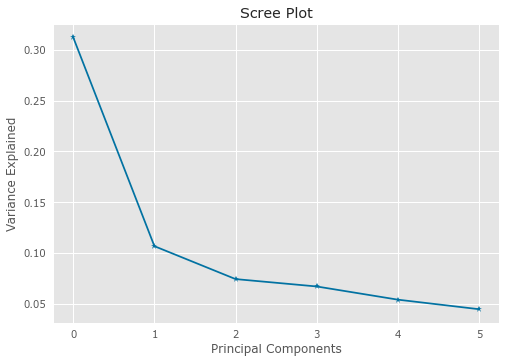

In [190]:
# Scree plot
plt.plot(pca.explained_variance_ratio_, color = 'b', marker = "*")
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

#### Observation:
- We see that there is a bend at index = 1, beyond which the variance explained decreases below 10%. But we take n_components = 3 so that the first 3 components contribute to about 54% of the total variation in the dataset

We set `n_components = 3` for our Principal Component Analysis.

In [191]:
# Import libraries
from sklearn.decomposition import PCA

# Setting n_components = 2 
pca = PCA(n_components = 3, random_state = 42)
# Fit
pca_fit = pca.fit(scaled_cust_copy)
# Transform and put in a dataframe
pca_ds = pd.DataFrame(pca_fit.transform(scaled_cust_copy), columns = ['PC1', 'PC2', 'PC3'])

In [192]:
# Summary Stats
pca_ds.describe()

PC1           PC2           PC3
count  2.186000e+03  2.186000e+03  2.186000e+03
mean  -1.511447e-16  3.311370e-17  2.691758e-17
std    2.904484e+00  1.698238e+00  1.417270e+00
min   -5.912441e+00 -4.253178e+00 -1.774008e+00
25%   -2.569210e+00 -1.333554e+00 -1.109840e+00
50%   -8.069462e-01 -1.561707e-01 -8.635606e-01
75%    2.369471e+00  1.245863e+00  1.748881e+00
max    7.819869e+00  6.255316e+00  2.682383e+00

##### 3-D projection of data in the reduced dimension

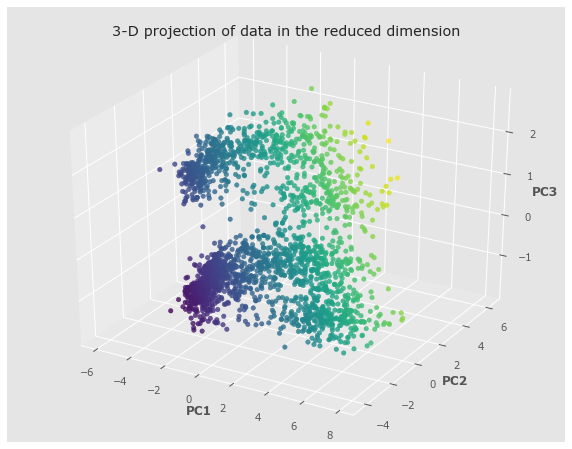

In [193]:
fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection ="3d")

# Creating 3D scatterplot
# ColourMap
pca_cmap = plt.get_cmap('viridis')
# Plot
ax.scatter3D(pca_ds['PC1'], pca_ds['PC2'], pca_ds['PC3'], 
             alpha = 0.8, # Opacity
             c = (pca_ds['PC1'] + pca_ds['PC2'] + pca_ds['PC3']), # 
             cmap = pca_cmap, 
             marker = 'o')
# Set title and labels
plt.title("3-D projection of data in the reduced dimension")
ax.set_xlabel('PC1', fontweight ='bold')
ax.set_ylabel('PC2', fontweight ='bold')
ax.set_zlabel('PC3', fontweight ='bold')
plt.show()

#### Observations:
- We can clearly see the formation of 4 clusters along the 3 Principal Component axes.

## 6. Clustering

- Where to use what clustering algorithm
- Differences

### 6.1 [K-Means Clustering](https://github.com/krishna-aditi/data-science-practice/blob/main/kmeans-implementation.ipynb)

#### What is K-means clustering?
K-means clustering is a popular unsupervised learning algorithm. It is used to split N observations into K clusters with similar characteristics.

The value of 'K', i.e. the number of clusters must be chosen carefully to attain optimum K-means performance. A lot of times the value of K can be the number of classes that exist in the dataset, but it varies based on the features we choose to take as input.

For example:
- In a dataset about animals, if we only take height and neck length as the input features then horse and zebra might be classified under the same class
- If the color of the skin of the animal is also used as an additional feature, then the animals may be separable.
Hence, the number of clusters might not always be equal to the number of classes. It depends on the input features. The number of clusters (K) is usually chosen based on 2 criteria:
- Inter-cluster separability
- Intra-cluster similarity
The optimum value of K is chosen based on analysis using the Elbow method or Silhouette method which is not explored in the scope of this assignment.

#### K-means clustering assumptions:
1. Data is not skewed
2. Features have the same mean
3. Features have the same variance

#### Algorithm
1. Set a value of **k**
2. Choose random **k** data points as centroids
3. For each data point x in the dataset:
    - Measure Euclidean distance to the centroid and assign it to the nearest centroid
    - Recalulate the centroids as the mean of each cluster
    - Reassign data points to new centroids
    - Continue the above steps in centroids keep changing. If centroids no longer change, then stop

### 6.2 Optimum number of clusters using [KElbowVisualizer](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html) for Elbow Method
- We use the KElbowVisualizer to find the optimum number of clusters in our dataset

In [194]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn import metrics

Optimum clusters evaluation using Elbow Method


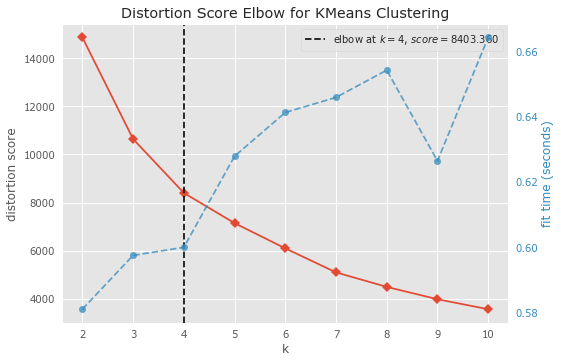

In [195]:
print('Optimum clusters evaluation using Elbow Method')
# The k values to compute silhouette scores for
# If a single integer is specified, then will compute the range (2,k)
elbow_method = KElbowVisualizer(KMeans(), k = 10, colors = 'viridis') # range = [2, 10]
elbow_method.fit(pca_ds)
elbow_method.show()

Above plot suggests that the elbow is at **k = 4**.

We now try to estimate the optimum number of clusters using Silhouette Analysis. 

### 6.3 Optimum number of clusters using Silhouette Analysis

#### Silhouette Method
- It is a method to find the optimal number of clusters
- The silhouette method computes silhouette coefficients of *each point* that measure how much a point is similar to its own cluster compared to other clusters
- We compute silhouette coefficients for each of point, and average it out for all the samples to get the **silhouette score**
- The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation)
- The value of the silhouette ranges between [1, -1]
    - A high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters
- If most points have a high value, then the clustering configuration is appropriate
- If many points have a low or negative value, then the clustering configuration may have too many or too few clusters

#### Computing Silhoutte Coefficient:
Steps to find the silhouette coefficient of an i’th point:
1. Compute a(i): The average distance of that point with all other points in the same clusters.
2. Compute b(i): The average distance of that point with all the points in the closest cluster to its cluster.
3. Compute s(i) — silhouette coefficient or i’th point using below mentioned formula.

$s(i) = ( b(i) - a(i) ) / max(b(i), a(i))$

`After computing the silhouette coefficient for each point, average it out to get the silhouette score.`

#### NOTE:
- The Silhouette coefficient of +1 indicates that the sample is far away from the neighboring clusters
- The Silhouette coefficient of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters
- The Silhouette coefficient < 0 indicates that those samples might have been assigned to the wrong cluster or are outliers

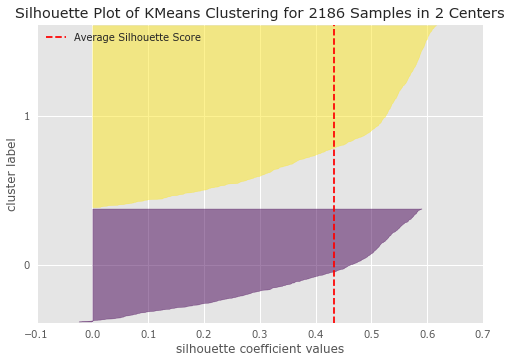

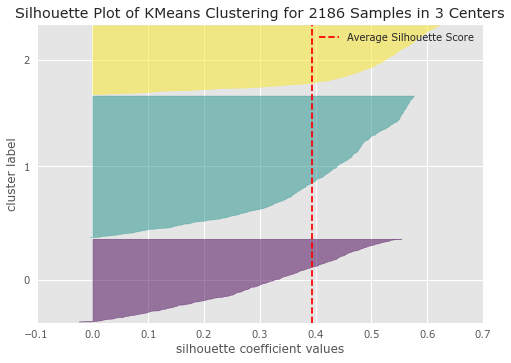

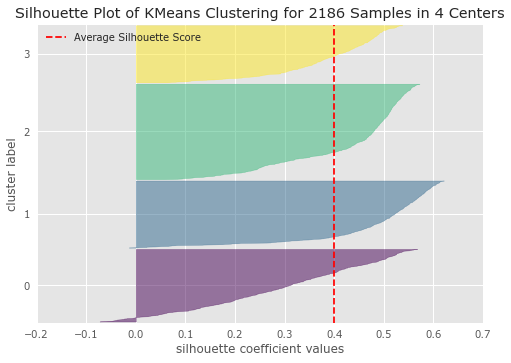

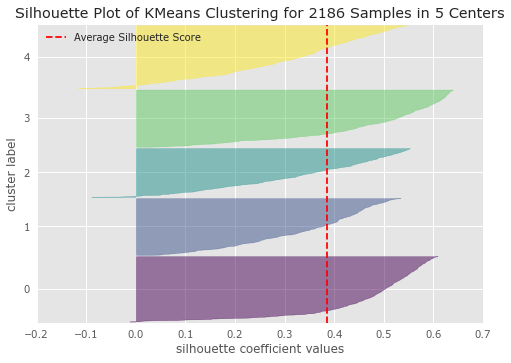

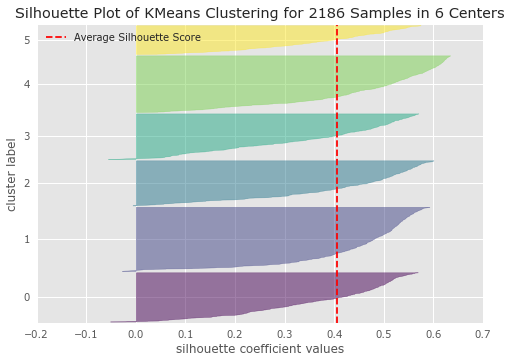

In [196]:
for i in range(2, 6 + 1):
    sil_method = SilhouetteVisualizer(KMeans(n_clusters = i), colors = 'viridis')
    sil_method.fit(pca_ds)
    sil_method.show()

### Observations from above Silhouette Plots:
- n_clusters = 2 & 3 is a bad pick
    - The thickness of the silhouette plot for the clusters with cluster_label = 0 & 1 is bigger in size owing to the grouping of sub-clusters into one big cluster
- n_clusters = 5 & 6 is a bad pick
    - The thickness of the silhouette plot for *all* clusters are thinner in size owing to the splitting of big clusters into several sub-clusters
- `n_clusters = 4` is a good pick
    - All the plots are more or less of similar thickness and hence are of similar sizes, as can be considered as best ‘k’
    - Average Silhouette score is around 0.38

### 6.4 [Density-Based Spatial Clustering of Applications With Noise (DBSCAN)](https://towardsdatascience.com/how-dbscan-works-and-why-should-i-use-it-443b4a191c80)
- It is a [density-based clustering algorithm](https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/) that works on the assumption that clusters are dense regions in space separated by regions of lower density
- [DBSCAN](https://www.reneshbedre.com/blog/dbscan-python.html) computes nearest neighbor graphs and creates *arbitrary-shaped* clusters in datasets (which may contain noise or outliers)
    - K-means clustering typically generates spherical-shaped clusters
- Unlike K-means clustering, DBSCAN does not require specifying the number of clusters initially
- **Parameters:**
    - Radius of neighborhoods for a given data point p `(eps)`
    - Minimum number of data points in a given neighborhood to form clusters `(minPts)`

#### Important terminologies
**1. Core point**
    - A randomly selected datapoint *p* is called **core point** `if there are more than a minimum number of points (minPts)` within a neighborhood of *p*
    
**2. Border point**
    - A datapoint is called a **border point** if it is within a neighborhood of *p* and `if there are fewer than the minimum number of points (minPts)` within a neighborhood of *p*
    
**3. Noise point (outlier)**
    - If a datapoint is not a core point or a borderpoint, then it is called a noise point
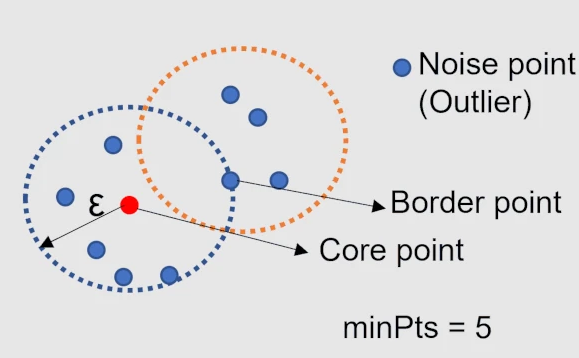

**4. Density reachable**
    - A point *x* is `directly density reachable` from point *p*, if a point *p* is a core point and *x* is in *p's* neighborhood
    - A point *y* is `density reachable` from point *p* if a point *y* is `directly density reachable` to core point *x*, which is also `density reachable` to core point *p*
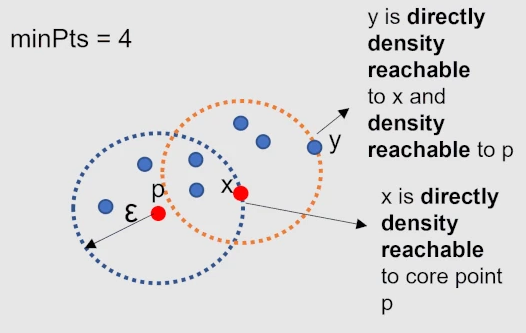

#### Algorithm
1. Choose any datapoint *p* randomly
2. Identify all `density reachable` points from *p* with set radius (eps) and minimum number of points (minPts) parameters
3. If *p* is a core point, create a cluster (with radius (eps) and minimum number of points (minPts))
4. If *p* is a border point, visit the next datapoint in dataset
5. Continue steps 1-4 until all datapoints are visited.

In [209]:
# Radius(eps) and minPts
dbscan_cluster = DBSCAN(eps = 2, min_samples = 10)

# Fit model and predict cluster
pred_cluster_dbscan = dbscan_cluster.fit_predict(pca_ds)

# Cluster labels for Agglomerative Clustering
dbscan_cluster_labels = dbscan_cluster.labels_

# Assign datapoints to clusters as a feature
pca_ds['Clusters'] = pred_cluster_dbscan

# Check number of unique clusters
# np.unique(dbscan_cluster_labels)

In [211]:
from sklearn.metrics import silhouette_score

sil_score_dbscan = silhouette_score(pca_ds, dbscan_cluster_labels)

# Format string to 3 decimal places
print(f'Silhouette Score for DBSCAN algorithm: {sil_score_dbscan: 0.3f}')

Silhouette Score for DBSCAN algorithm:  0.231


#### Plotting the clusters after DBSCAN in 3-D view

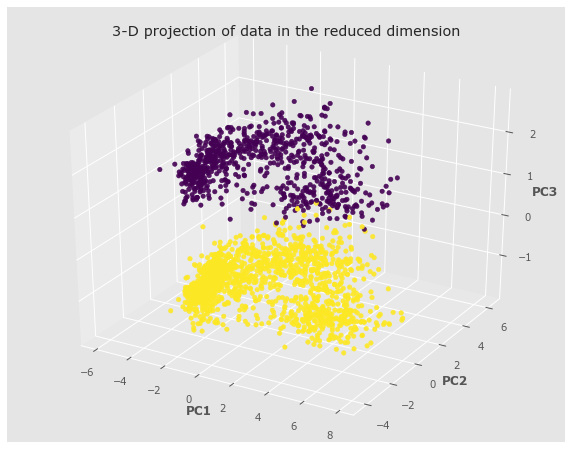

In [221]:
# 3D view of predicted clusters
fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection ="3d")

# Creating 3D scatterplot
# ColourMap
pca_cmap = plt.get_cmap('viridis')
# Plot
ax.scatter3D(pca_ds['PC1'], pca_ds['PC2'], pca_ds['PC3'], 
             alpha = 0.9, # Opacity
             c = (pca_ds['Clusters']),
             cmap = pca_cmap, 
             marker = 'o')
# Set title and labels
plt.title("3-D projection of data in the reduced dimension")
ax.set_xlabel('PC1', fontweight ='bold')
ax.set_ylabel('PC2', fontweight ='bold')
ax.set_zlabel('PC3', fontweight ='bold')
plt.show()

### 6.5 Agglomerative Hierarchical Clustering
- Agglomerative Clustering is a type of hierarchical clustering algorithm
- It is an unsupervised machine learning technique that divides the population into several clusters such that
    - Points in same cluster are closer to each other, hence more alike (similar)
    - Points in different clusters are far apart (dissimilar)
- Agglomerative Clustering is a bottom-up approach, initially each data point is a cluster of its own, further pairs of clusters are merged as one moves up the hierarchy

#### Algorithm
1. Set all data-points as a cluster of its own
2. Take two nearest clusters and joing them to form one single cluster
3. Repeat step-2 until you obtain the desired number of clusters

#### How are any two clusters joined to form one cluster? [Estimating similarity between clusters](https://towardsdatascience.com/calculate-similarity-the-most-relevant-metrics-in-a-nutshell-9a43564f533e)
- To obtain the desired number of clusters, the number of clusters need to be reduced from intially being **n** clusters ( n = no. of datapoints)
- `Two clusters are combined by computing the similarity between them`

In [222]:
# Clustering with n_clusters = 4
agglo_cluster = AgglomerativeClustering(n_clusters = 4)

# Fit model and predict cluster
pred_cluster_agglo = agglo_cluster.fit_predict(pca_ds)

# Cluster labels for Agglomerative Clustering
agglo_cluster_labels = agglo_cluster.labels_

# Assign datapoints to clusters as a feature 
pca_ds['Clusters'] = pred_cluster_agglo

In [223]:
from sklearn.metrics import silhouette_score

sil_score_agglomerative = silhouette_score(pca_ds, agglo_cluster_labels)

# Format string to 3 decimal places
print(f'Silhouette Score for Agglomerative Clustering algorithm: {sil_score_agglomerative: 0.3f}')

Silhouette Score for Agglomerative Clustering algorithm:  0.399


In [224]:
# Dataframe with sil-score for each model
sil_score_df = pd.DataFrame([['Agglomerative Clustering', sil_score_agglomerative], ['DBSCAN', sil_score_dbscan]], columns = ['Algorithm', 'Silhouette-Score']) 
sil_score_df

Algorithm  Silhouette-Score
0  Agglomerative Clustering          0.399324
1                    DBSCAN          0.231196

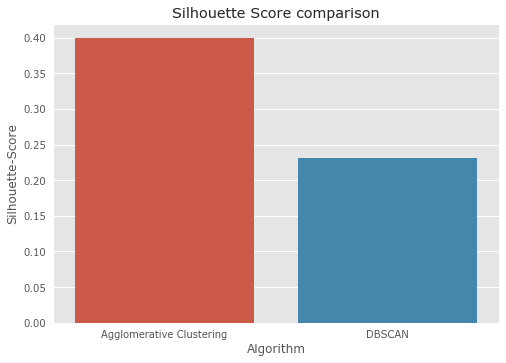

In [225]:
# Barplot
sns.barplot(sil_score_df['Algorithm'], sil_score_df['Silhouette-Score'])
plt.title('Silhouette Score comparison')
plt.show()

The **Agglomerative Clustering algorithm** works better for our dataset and has the highest silhouette score.

In [226]:
# Adding 'Clusters' feature to original dataframe of customer data
cust_data['Clusters'] = pred_cluster_agglo

#### Plotting the clusters after Agglomerative Clustering in a 3-D view

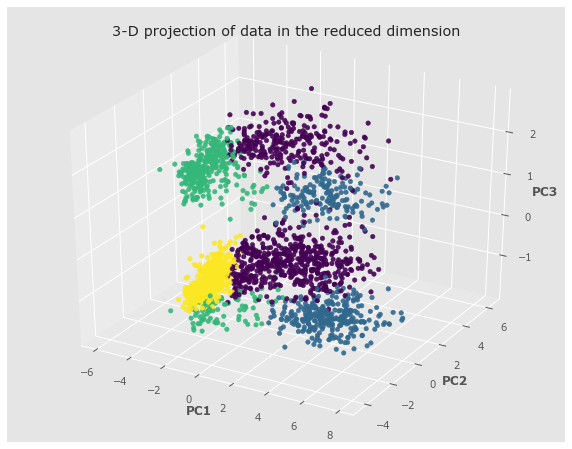

In [227]:
# 3D view of predicted clusters
fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection ="3d")

# Creating 3D scatterplot
# ColourMap
pca_cmap = plt.get_cmap('viridis')
# Plot
ax.scatter3D(pca_ds['PC1'], pca_ds['PC2'], pca_ds['PC3'], 
             alpha = 0.9, # Opacity
             c = (pca_ds['Clusters']),
             cmap = pca_cmap, 
             marker = 'o')
# Set title and labels
plt.title("3-D projection of data in the reduced dimension")
ax.set_xlabel('PC1', fontweight ='bold')
ax.set_ylabel('PC2', fontweight ='bold')
ax.set_zlabel('PC3', fontweight ='bold')
plt.show()

## 7. Cluster evaluation

### 7.1 Distribution of data points in clusters

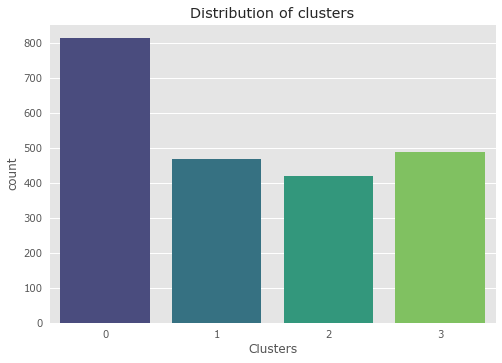

In [228]:
# Countplot
sns.countplot(cust_data['Clusters'], palette = 'viridis')
plt.title('Distribution of clusters')
plt.show()

### Observations:
- Clusters seem to be fairly distributed. 

### 7.2 Scatterplot for 'Income' vs. 'Spending' of customers

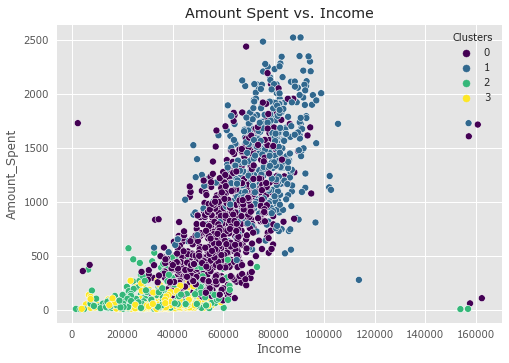

In [229]:
# Income vs Amount_Spent
sns.scatterplot( x = cust_data['Income'], y = cust_data['Amount_Spent'], hue = cust_data['Clusters'], palette = 'viridis')
plt.title('Amount Spent vs. Income')
plt.show()

### Observations:
- **Cluster 0**: Average Income, High Spending
    
- **Cluster 1**: High Income, High Spending
        
- **Cluster 2**: Average income, Low Spending
    
- **Cluster 3**: Low Income, Low Spending

### 7.3 [Boxenplots](https://towardsdatascience.com/letter-value-plot-the-easy-to-understand-boxplot-for-large-datasets-12d6c1279c97) for visualizing the distribution of Amount_Spent by customers

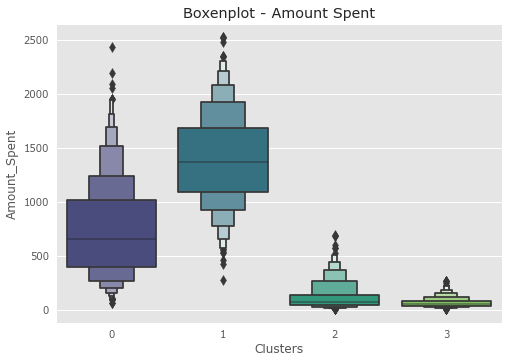

In [230]:
# Amount spent 
sns.boxenplot(x = cust_data['Clusters'], y = cust_data['Amount_Spent'], palette = 'viridis' )
plt.title('Boxenplot - Amount Spent')
plt.show()

### Observations:
- **Cluster 1 (High Income, High Spending)** group is the biggest set of customers, followed by **Cluster 0 (Average income, High Spending)**

### 7.4 Analyzing past campaigns

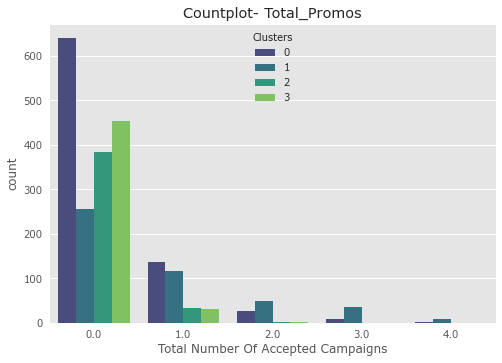

In [231]:
# Countplot
sns.countplot( x = cust_data['Total_Promos'], hue = cust_data['Clusters'], palette = 'viridis')
plt.title('Countplot- Total_Promos')
plt.xlabel('Total Number Of Accepted Campaigns')
plt.show()

### Observations:
- **Promotion 1** shows higher count of engagement from all the customers
- Overall reponse to promotions is very underwhelming
- **Cluster 1 (High Income, High Spending)** engages in all five promotional offers
- Targeted and well-planned campaigns are required to boost sales

### 7.5 Boxenplot for Number of deals purchased

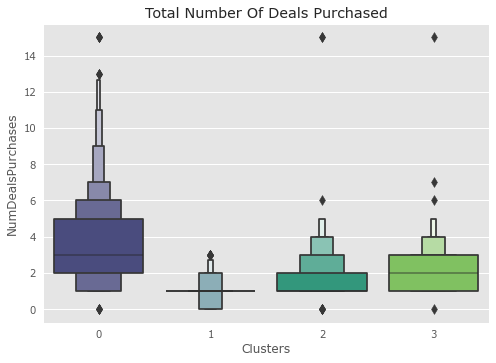

In [232]:
# NumOfDealsPurchased
sns.boxenplot(x = cust_data['Clusters'], y = cust_data['NumDealsPurchases'], palette = 'viridis' )
plt.title('Total Number Of Deals Purchased')
plt.show()

### Observations:
- Deals performed better than campaigns
- **Cluster 0 (Average Income, High Spending)** and **Cluster 3 (Low income, Low Spending)** have the best engagement for deals
- **Cluster 1 (High Income, High Spending)** is *not* as interested in Deals

## 8. Profiling
- Now that the clusters are formed, lets see what are the personal features of the customers in these clusters
- This will be helpful in analyzing the target audience for the retail firm's marketing team to build targeted campaigns and promotions

We use [jointplots](https://seaborn.pydata.org/generated/seaborn.jointplot.html) to analyze relationship between the various personal features and the amount spent by customer groups.

<Figure size 1080x720 with 0 Axes>

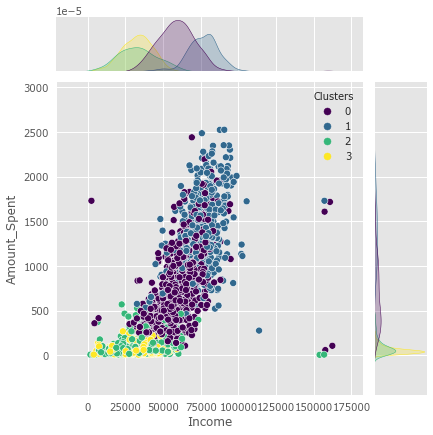

<Figure size 1080x720 with 0 Axes>

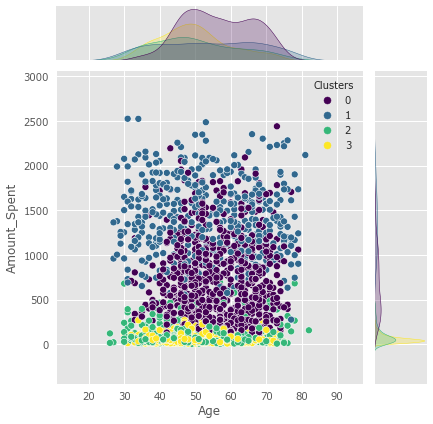

<Figure size 1080x720 with 0 Axes>

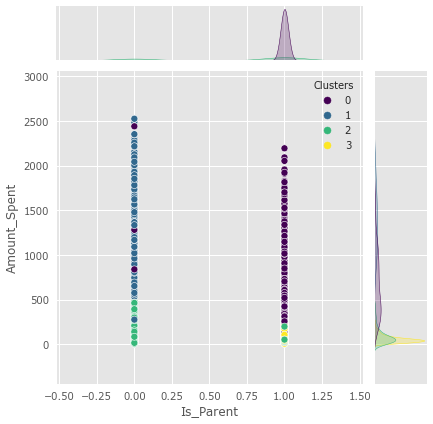

<Figure size 1080x720 with 0 Axes>

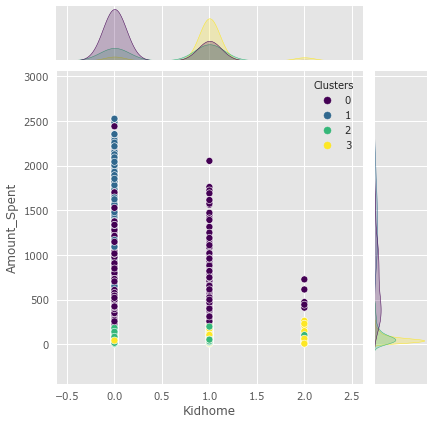

<Figure size 1080x720 with 0 Axes>

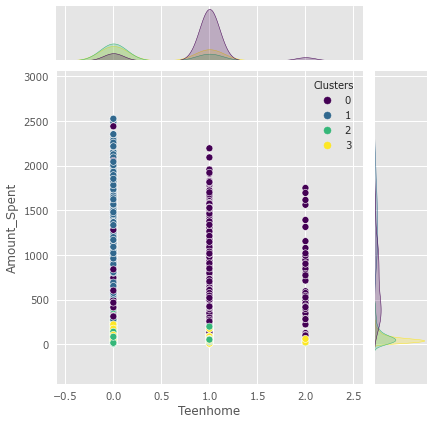

<Figure size 1080x720 with 0 Axes>

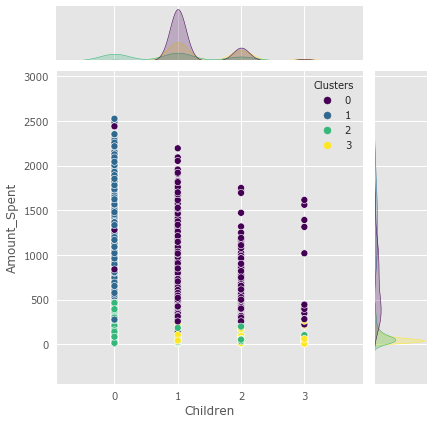

<Figure size 1080x720 with 0 Axes>

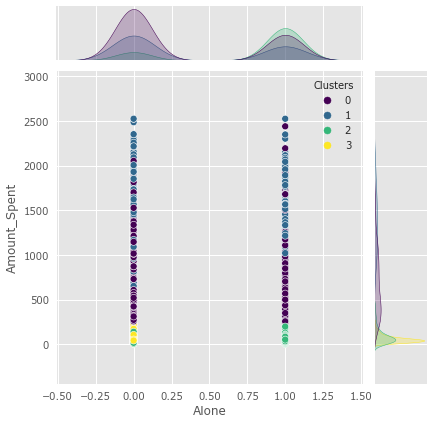

<Figure size 1080x720 with 0 Axes>

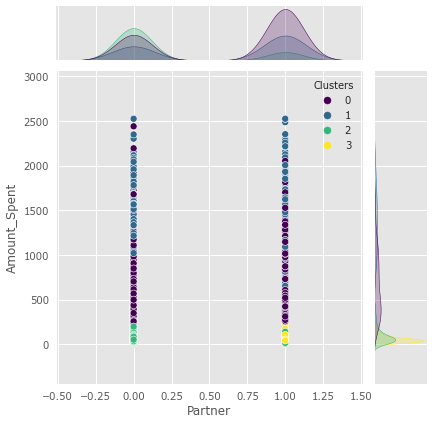

<Figure size 1080x720 with 0 Axes>

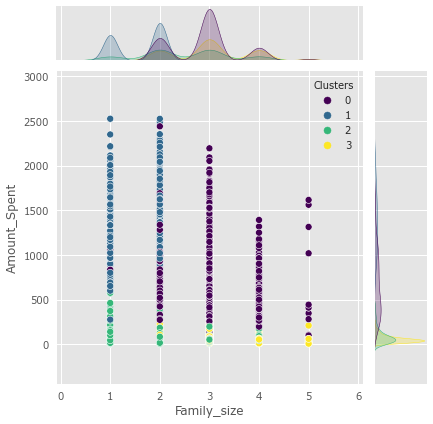

In [234]:
# List of personal features of customers we're interested in
personal_feat = ['Income','Age', 'Is_Parent', 'Kidhome', 'Teenhome', 'Children', 'Alone', 'Partner', 'Family_size']

# Plot
for feat in personal_feat:
    fig = plt.figure(figsize = (15,10))
    sns.jointplot(x = cust_data[feat], y = cust_data['Amount_Spent'], hue = cust_data['Clusters'], kind ='scatter', palette = 'viridis')
    plt.show()

### Observations:
- **Cluster 0:** 
    - **Average Income, High Spending**
    - Are definitely a parent (also includes single parents)
        - Most have two teenagers at home, or one teenager and one kid
    - Either has a partner and kids, or is a single parent with kid
    -  Family size of 2 to 5
    - Age span of 40 to 70
     - Second most important set of customers 
    
- **Cluster 1:**
    - **High Income, High Spending**
    - Family size of 1 to 2, i.e. single and couples
    - Mostly not a parent
    - Spans across all age groups
    - Biggest set of customers
    
- **Cluster 2:**
    - **Average income, Low Spending**
    - Mostly not a parent, but some are with one kid (typically teenager)
    - Mostly single 
    - Family size of 2 to 3 
    - Spans across all age groups

- **Cluster 3:**
    - **Low income, Low Spending**
    - Mostly are a parent
        - Mostly have two kids
    - Most of them have partners
    - Family size 3 to 5
    - Age span of 30 to 60

## 9. Conclusion
- Using unsupervised clustering we came up with 4 groups of customers based on their personal features, income and spending habits
- We performed PCA for dimensionality reduction and used agglomerative clustering to form clusters
- The above analysis can be used to build targeted marketing strategies and promotional offers

- Dimensionality reduction
- P